<h1 style="text-align: center">
    Simulation of a Predator–Prey System with Constant Harvesting and Prey Group Defense 
</h1>
<h2 style="text-align: center">By: Guillermo De Mendoza & Nataly Roa</h2>

### Imported lybraries

In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

### model: dx and dy

In [17]:
def calculate_model(inputValues, t, r, K, alfa, Th, sigma, c, h1):
    inputX = inputValues[0]
    inputY = inputValues[1]
    
    if inputX < 0:
        inputX = 0
    if inputY < 0:
        inputY = 0
    
    dx = r*inputX*(1-(inputX/K)) - (alfa*math.sqrt(inputX*inputY))/(1+Th*alfa*math.sqrt(inputX)) - h1
    dy = -1*sigma*inputY + (c*alfa*math.sqrt(inputX*inputY))/(1+Th*alfa*math.sqrt(inputX))
    return np.array([dx, dy])

In [18]:
def simulate_model(initX,initY):
    
    ITERATIONS = 1000
    
    X,Y = initX,initY
    
    results_time = []
    results_X = []
    results_Y = []
    
    for i in range(ITERATIONS):
    
        if(X<0):
            X = 0
        if(Y<0):
            Y = 0

        results_time.append(i)
        results_X.append(X)
        results_Y.append(Y)

        dx = r*X*(1-(X/K)) - (alfa*math.sqrt(X*Y))/(1+Th*alfa*math.sqrt(X)) - h1
        dy = -1*sigma*Y + (c*alfa*math.sqrt(X*Y))/(1+Th*alfa*math.sqrt(X))
        X += dx
        Y += dy
        
    return results_time,results_X,results_Y

### Graphing tools

In [19]:
def generate_simulation_graph(results_time,results_X,results_Y):
    
    # Grafica tiempos vs población
    plt.plot(results_time,results_X, label='xi presa')
    plt.plot(results_time,results_Y, label='yi predador')
    plt.title('Modelo predador-presa')
    plt.xlabel('t tiempo')
    plt.ylabel('población')
    plt.legend()
    plt.grid()
    plt.show()

def generate_versus_graph(results_X,results_Y):
    
    # gráfica xi vs yi
    plt.plot(results_X,results_Y, color="red")
    plt.title('Modelo presa-predador [xi,yi]')
    plt.xlabel('x presa')
    plt.ylabel('y predador')
    plt.grid()
    plt.show()

In [20]:
def generate_phase_graph(X,Y,results_X,results_Y):
    
    #generar requerimientos
    conds_iniciales = np.array([X, Y])
    t = np.linspace(0, 1000, 1000)
    #solucion = odeint(calculate_model, conds_iniciales, t, args=(r, K, alfa, Th, sigma, c, h1))

    #generar grafica de fases
    x_max = 1000
    y_max = 300
    x = np.linspace(0, x_max, 25)
    y = np.linspace(0, y_max, 25)
    xx, yy = np.meshgrid(x, y)
    
    uu = []
    vv = []
    operate = len(xx)
    for i in range(operate):
        iuu = []
        ivv = []
        for j in range(len(xx[i])):
            temp_uu, temp_vv = calculate_model([xx[i][j], yy[i][j]], 0, r, K, alfa, Th, sigma, c, h1)
            iuu.append(temp_uu)
            ivv.append(temp_vv)
        uu.append(iuu)
        vv.append(ivv)
        
    uu = np.array(uu)
    vv = np.array(vv)
    
    norm = np.sqrt(uu**2 + vv**2)
    uu = uu / norm
    vv = vv / norm
    plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
    plt.plot(results_X,results_Y,color='red')
    
    plt.title('Campo de direcciones [xi,yi]')
    plt.xlabel('x presa')
    plt.ylabel('y predador')
    plt.show()

### Model parameters

In [30]:
X = 100 #number of preys
Y = 10 #number of predators

r = 0.3 #logistic growth rate for preys
K = 1000 #max enviorment capacity
alfa = 0.3 #is the search efficiency of the predator for prey
Th = 0.2 #is the average handling time for each prey
sigma = 0.1 #is the natural death rate for predators
c = 0.5 #is the biomass conversión rate of prey population to predator population

h1 = 20 #11 human harvesting for preys

### Run simulation

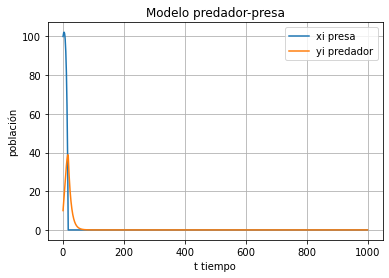

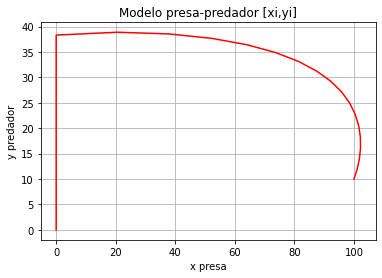

In [31]:
t,x,y = simulate_model(X,Y)
generate_simulation_graph(t,x,y)
generate_versus_graph(x,y)

### Generate direction fields

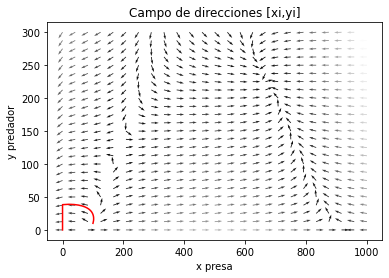

In [32]:
generate_phase_graph(X,Y,x,y)